**Problem Statement:**

  The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

#Evaluation Criteria (100 points)

    

    1. Importing the libraries & Reading the data file (10 points)
      

In [2]:
import pandas as pd
df=pd.read_csv('/content/sample_data/flipitnews-data.csv')
#df=df.head(30)
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


    2. Exploring the dataset (10 points)
          *   Shape of the dataset
          *   News articles per category

In [2]:
print('Shape of Dataset - ',df.shape)
print('Total No. of News Articles - ',df['Category'].nunique(),':',df['Category'].unique())
print('News Article per category - \n',df['Category'].value_counts())
print('Shape of Dataset - ',df.shape)
#print('\nInfo - \n',df.info)

Shape of Dataset -  (5, 2)
Total No. of News Articles -  4 : ['Technology' 'Business' 'Sports' 'Entertainment']
News Article per category - 
 Sports           2
Technology       1
Business         1
Entertainment    1
Name: Category, dtype: int64
Shape of Dataset -  (5, 2)


**Categorical to Numerical Encoding**
Now, we will map each of these categories to a number, so that our model can understand it in a better way and we will save this in a new column named ‘category_id’. Where each of the categories are represented in numerical.


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category_id']=le.fit_transform(df['Category'])

**Data Visualisation**

<Axes: >

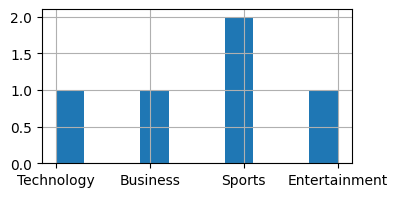

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
df['Category'].hist()

      3. Processing the Textual Data i.e. the news articles (30 points)

          Removing the non-letters

          Tokenizing the text

          Removing stopwords

          Lemmatization

In [60]:
#*************************************Removing Stopwords *******************************
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#print(stopwords.words('english'))
def remove_stopwords(text):
  clean_text=' '.join([i for i in text.split() if i not in stopwords.words('english')])
  return clean_text

df['Article']=df['Article'].apply(lambda x:remove_stopwords(x))

#*************************************Removing Punctuations *******************************
import string

def remove_punctuation(text):
  cleantext=''.join([i for i in text if i not in string.punctuation])
  return cleantext

df['Article']=df['Article'].apply(lambda x:remove_punctuation(x))

#*************************************Lowering the Text *******************************
df['Article']=df['Article'].str.lower()

#*************************************Stemming *******************************
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stemming(text):
  clean_text=' '.join([ps.stem(i) for i in text.split()])
  return clean_text

df['Article']=df['Article'].apply(lambda x:stemming(x))

#*************************************Lemmatization *******************************
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
nltk.download('wordnet')
def Lemmatize(text):
  clean_text=' '.join([wl.lemmatize(i) for i in text.split()])
  return clean_text

df['Article']=df['Article'].apply(lambda x:Lemmatize(x))
df['Article']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       tv futur hand viewer home theatr system plasma...
1       worldcom bos left book alon former worldcom bo...
2       tiger wari farrel gambl leicest say rush make ...
3       yead face newcastl fa cup premiership side new...
4       ocean twelv raid box offic ocean twelv crime c...
                              ...                        
2220    car pull u retail figur u retail sale fell 03 ...
2221    kilroy unveil immigr polici exchatshow host ro...
2222    rem announc new glasgow concert u band rem ann...
2223    polit squabbl snowbal becom commonplac argu bl...
2224    souness delight euro progress bos graem sounes...
Name: Article, Length: 2225, dtype: object

In [3]:
#*************************************Tokenization *******************************

import nltk
from nltk.tokenize import word_tokenize ,sent_tokenize
nltk.download('punkt')

word_cnt,unique_word_cnt=0,0

#Corpus of the entire Document
corpus=df['Article'].str.cat(sep=', ')
#print('corpus:',corpus)
for i in corpus:
  word_cnt+=1
print('Number of words in the entire corpus:',word_cnt)
#Find the letters used in Corpus
Unique_char=set(df['Article'].str.cat(sep=', '))
#print('Unique letters used in corpus:',Unique_char)

Vocabulary = df['Article'].str.cat(sep=', ')
print(set(word_tokenize(Vocabulary)))
for i in set(word_tokenize(Vocabulary)):
  unique_word_cnt+=1
print('Number of words in the vocabulary:',unique_word_cnt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of words in the entire corpus: 5039481
{'ppi', 'luxemburgo', 'member', 'ruthless', 'arse', '8.6m', 'samples', 'motions', 'manifesto', 'incensed', 'bertelsmann', 'bank.', 'denise', 'adverse', 'desai', 'obligatory', 'wonderfully', 'republicans', 'years.perhaps', 'territory', 'held.', 'overbalancing', 'living', 'backstage', 'brian', 'intent', '920', 'old-timers', 'geared', 'terrestre', 'ukip', '5.25', 'consultation', 'crediting', 'unearthing', 'killers', 'sensitive', 'volcano', 'tattoos', 'silliere', 'danner', 'fate', '47.', 'strongest', 'mediocre', 'quint', '387m', 'demographics', 'one-to-one', 'accolades', '9.8', 'addition', 'firmly', 'veils', 'retention', 'excite', 'unrelated', 'melton', 'energy', '32-strong', 'comparatively', 'correct', 'fat-cat', 'precisely-calculated', 're-entered', '24', 'ormond', 'julien', 'citadel', 'gas-electric', 'willow', 'vic', 'all-russian', 'american-themed', 'comeback', 'authorities', 'first-quarter', '1924-5', 'totals', 'underscore', 'no-nonsense',

**4. Encoding and Transforming the data (20 points)**

    Encoding the target variable

    Bag of Words

    TF-IDF

    Train-Test Split

In [13]:
#*************************************One hot Encoding *******************************
def get_one_hot_vectors():
  import numpy as np

  samples = df['Article']
  # Create an empty dictionary
  token_index = {}
  #Create a counter for counting the number of key-value pairs in the token_length
  counter = 0

  # Select the elements of the samples which are the two sentences
  for sample in samples:
    for considered_word in sample.split():
      if considered_word not in token_index:

        # If the considered word is not present in the dictionary token_index, add it to the token_index
        # The index of the word in the dictionary begins from 1
        token_index.update({considered_word : counter + 1})

        # updating the value of counter
        counter = counter + 1
  print(token_index)
  # Set max_length to 6
  max_length =max(samples.str.len())
  # Create a tensor of dimension 3 named results whose every elements are initialized to 0
  results  = np.zeros(shape = (len(samples),max_length,max(token_index.values())))
  # Now create a one-hot vector corresponding to the word
  # iterate over enumerate(samples) enumerate object
  for i, sample in enumerate(samples):
    #print(i,sample)
  # Convert enumerate object to list and iterate over resultant list
    for j, considered_word in list(enumerate(sample.split())):
      #print(j,considered_word)

      # set the value of index variable equal to the value of considered_word in token_index
      index = token_index.get(considered_word)-1
      #print('index',index)
      # In the previous zero tensor: results, set the value of elements with their positional index as [i, j, index] = 1.
      results[i, j, index] = 1.
  #for j, considered_word in list(enumerate(sample.split())):
  # print(j, considered_word)
  print(samples)
  print(results[0])

{'tv': 1, 'futur': 2, 'hand': 3, 'viewer': 4, 'home': 5, 'theatr': 6, 'system': 7, 'plasma': 8, 'highdefinit': 9, 'digit': 10, 'video': 11, 'record': 12, 'move': 13, 'live': 14, 'room': 15, 'way': 16, 'peopl': 17, 'watch': 18, 'radic': 19, 'differ': 20, 'five': 21, 'year': 22, 'time': 23, 'accord': 24, 'expert': 25, 'panel': 26, 'gather': 27, 'annual': 28, 'consum': 29, 'electron': 30, 'show': 31, 'la': 32, 'vega': 33, 'discus': 34, 'new': 35, 'technolog': 36, 'impact': 37, 'one': 38, 'favourit': 39, 'pastim': 40, 'u': 41, 'lead': 42, 'trend': 43, 'programm': 44, 'content': 45, 'deliv': 46, 'via': 47, 'network': 48, 'cabl': 49, 'satellit': 50, 'telecom': 51, 'compani': 52, 'broadband': 53, 'servic': 54, 'provid': 55, 'front': 56, 'portabl': 57, 'devic': 58, 'talkedabout': 59, 'ce': 60, 'person': 61, 'dvr': 62, 'pvr': 63, 'settop': 64, 'box': 65, 'like': 66, 'tivo': 67, 'uk': 68, 'sky': 69, 'allow': 70, 'store': 71, 'play': 72, 'paus': 73, 'forward': 74, 'wind': 75, 'want': 76, 'essenti

In [8]:
#*************************************Bag of Words *******************************
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(df['Article'])
print("\nVocabulary:")
print(cv.vocabulary_)

# Display the BOW matrix and vocabulary
print("Bag of Words Matrix:",bow.toarray().shape)
print(bow.toarray())
#print('Frequency of words',bow.toarray().sum(axis=0))
#print('words in vocabulary',cv.get_feature_names_out())


Vocabulary:
{'tv': 640, 'futur': 255, 'hand': 282, 'viewer': 658, 'home': 301, 'theatr': 608, 'system': 598, 'plasma': 461, 'highdefinit': 294, 'digit': 177, 'video': 657, 'record': 507, 'move': 405, 'live': 364, 'room': 527, 'way': 666, 'peopl': 451, 'watch': 664, 'radic': 497, 'differ': 175, 'five': 240, 'year': 691, 'time': 617, 'accord': 29, 'expert': 222, 'panel': 443, 'gather': 262, 'annual': 54, 'consum': 148, 'electron': 199, 'show': 558, 'la': 342, 'vega': 654, 'discus': 181, 'new': 415, 'technolog': 603, 'impact': 310, 'one': 432, 'favourit': 231, 'pastim': 447, 'lead': 353, 'trend': 632, 'programm': 484, 'content': 149, 'deliv': 171, 'via': 655, 'network': 413, 'cabl': 105, 'satellit': 537, 'telecom': 604, 'compani': 142, 'broadband': 97, 'servic': 551, 'provid': 490, 'front': 251, 'portabl': 466, 'devic': 173, 'talkedabout': 601, 'ce': 115, 'person': 454, 'dvr': 193, 'pvr': 494, 'settop': 553, 'box': 89, 'like': 361, 'tivo': 618, 'uk': 644, 'sky': 566, 'allow': 44, 'store'

In [9]:
  #*************************************TFIDF - Term Frequency/Inverse Document Frequency *******************************
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
#print(tfidf.idf_)
TFIDF=tfidf.fit_transform(df['Article'])
print("\nVocabulary:")
print(tfidf.vocabulary_)

# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())



Vocabulary:
{'tv': 640, 'futur': 255, 'hand': 282, 'viewer': 658, 'home': 301, 'theatr': 608, 'system': 598, 'plasma': 461, 'highdefinit': 294, 'digit': 177, 'video': 657, 'record': 507, 'move': 405, 'live': 364, 'room': 527, 'way': 666, 'peopl': 451, 'watch': 664, 'radic': 497, 'differ': 175, 'five': 240, 'year': 691, 'time': 617, 'accord': 29, 'expert': 222, 'panel': 443, 'gather': 262, 'annual': 54, 'consum': 148, 'electron': 199, 'show': 558, 'la': 342, 'vega': 654, 'discus': 181, 'new': 415, 'technolog': 603, 'impact': 310, 'one': 432, 'favourit': 231, 'pastim': 447, 'lead': 353, 'trend': 632, 'programm': 484, 'content': 149, 'deliv': 171, 'via': 655, 'network': 413, 'cabl': 105, 'satellit': 537, 'telecom': 604, 'compani': 142, 'broadband': 97, 'servic': 551, 'provid': 490, 'front': 251, 'portabl': 466, 'devic': 173, 'talkedabout': 601, 'ce': 115, 'person': 454, 'dvr': 193, 'pvr': 494, 'settop': 553, 'box': 89, 'like': 361, 'tivo': 618, 'uk': 644, 'sky': 566, 'allow': 44, 'store'

In [10]:
#*************************************Train-test split *******************************
X=df['Article']
y=df['Category_id']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4,), (1,), (4,), (1,))

Enable the line no. with Ctrl+shift+M

    Line 7: Iterate the corpus
    Line 9: Set the ith word as the target word
    Line 14,21,27 : Condition to check if the ith word in line 9 is the (first :Best) , (middle : way) or the (last : persistence) word .
    Line 17 : If it is the first word, get the next 2 (window_size =2) words and set them as context words
    Line 21 : If it is the last word, get the previous 2 (window_size =2) words and set them as context words
    Line 30,37 : If our ith word is a middle word, then we need to get 2 (window_size =2) words before the ith word and 2 (window_size =2 ) words after the ith word and set all 4 as the context words. If there is only 1 word before or after the ith word, we get only 1 word.

In [10]:
def conf_matrix(y_test, y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  conf_mat = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_mat, annot=True, xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique(), cmap="YlGnBu", fmt='g')


#Exploring Multi-classification Models(classification models)

**5. Model Training & Evaluation (30 points)**

    Simple Approach - Naive Bayes

    Functionalized Code (Optional)- Decision Tree,Nearest Neighbors,RandomForest

**1. Naive Bayes - MultinomialNB**

(1780,) (445,) (1780,) (445,)
accuracy 0.9617977528089887
               precision    recall  f1-score   support

     Business       0.96      0.95      0.96       101
Entertainment       1.00      0.88      0.93        81
     Politics       0.91      0.99      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.95      0.99      0.97        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



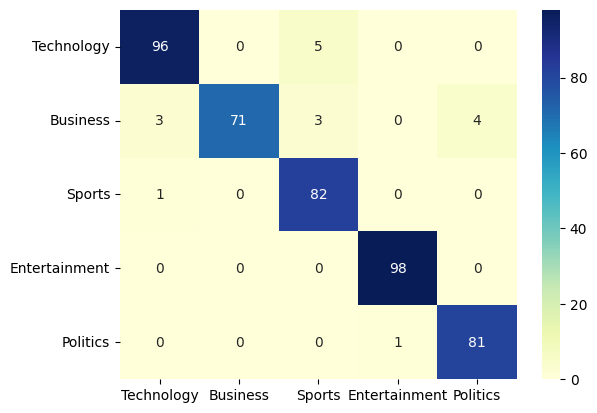

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df['Article']
y = df['Category']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

  **2. SGDClassifier**

    Linear Support Vector Machine is widely regarded as one of the best text
    classification algorithms.

accuracy 0.9640449438202248
               precision    recall  f1-score   support

     Business       0.96      0.92      0.94       101
Entertainment       0.97      0.96      0.97        81
     Politics       0.93      0.98      0.95        83
       Sports       0.98      1.00      0.99        98
   Technology       0.98      0.96      0.97        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



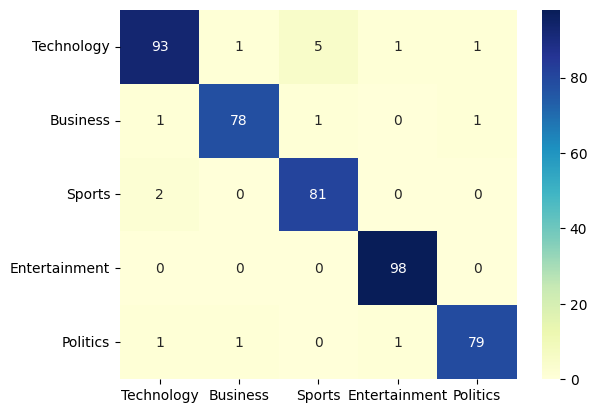

In [64]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

**Logistic Regression**
    
    Simple and easy to understand classification algorithm, and Logistic regression can be easily generalized to multiple classes.

accuracy 0.9775280898876404
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      1.00      0.98        70
           2       0.99      0.96      0.97        96
           3       0.99      1.00      1.00       105
           4       0.99      0.95      0.97        83

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



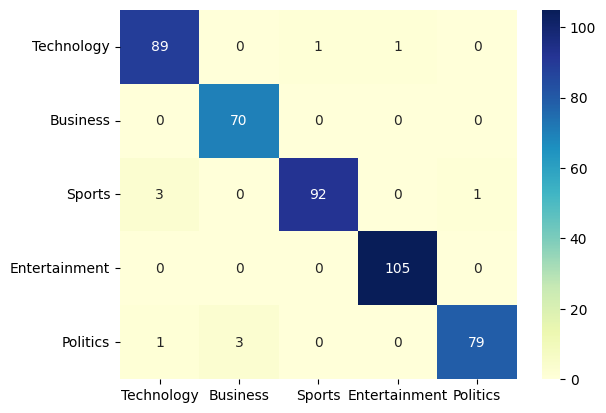

In [76]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

In [118]:
complaint = "games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by christmas."

print(logreg.predict([complaint]))


[4]


In [117]:
df[['Category','Category_id']].drop_duplicates()

,Category,Category_id
0,Technology,4
1,Business,0
2,Sports,3
4,Entertainment,1
5,Politics,2


#Using the same data set, we are going to try some advanced techniques such as word embedding and neural networks. Now, let’s try some complex features than just simply counting words.



**Decision Tree**
    
    Most powerful tools of supervised learning algorithms used for both classification and regression tasks.
    DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

accuracy 0.8561797752808988
               precision    recall  f1-score   support

   Technology       0.79      0.85      0.82       110
     Business       0.80      0.74      0.77        72
       Sports       0.85      0.90      0.87        69
Entertainment       0.95      0.88      0.92       113
     Politics       0.88      0.89      0.88        81

    micro avg       0.86      0.86      0.86       445
    macro avg       0.85      0.85      0.85       445
 weighted avg       0.86      0.86      0.86       445
  samples avg       0.86      0.86      0.86       445



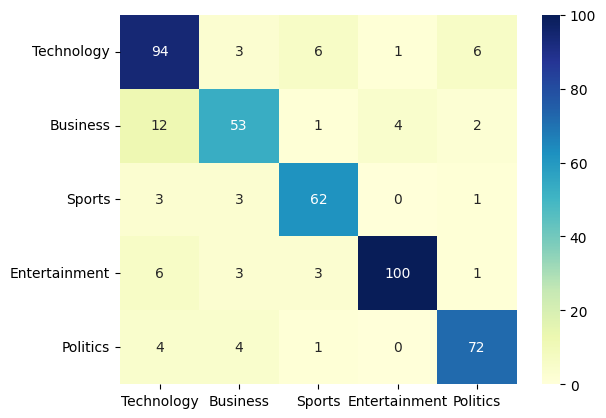

In [68]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

In [69]:
#plot_tree(model,filled=True,max_depth=2)

accuracy 0.8
               precision    recall  f1-score   support

   Technology       1.00      0.89      0.94        81
     Business       1.00      0.65      0.79        86
       Sports       0.98      0.68      0.81        82
Entertainment       1.00      0.99      1.00       103
     Politics       1.00      0.75      0.86        93

    micro avg       1.00      0.80      0.89       445
    macro avg       1.00      0.79      0.88       445
 weighted avg       1.00      0.80      0.88       445
  samples avg       0.80      0.80      0.80       445



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


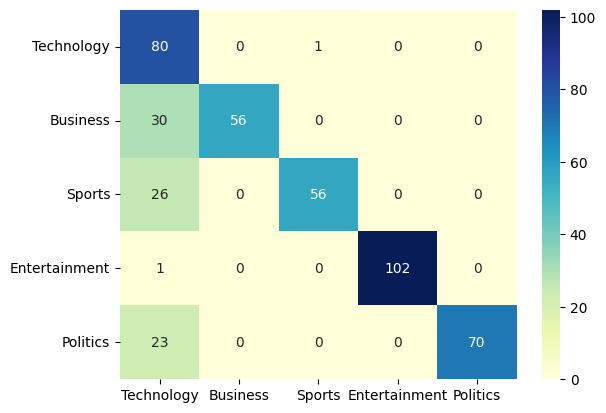

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

RFC=RandomForestClassifier(random_state=7,criterion='gini')
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)


print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

accuracy 0.6359550561797753
               precision    recall  f1-score   support

   Technology       0.93      0.48      0.63       109
     Business       0.96      0.41      0.58        63
       Sports       0.96      0.69      0.80        98
Entertainment       0.45      1.00      0.62       101
     Politics       1.00      0.49      0.65        74

    micro avg       0.68      0.64      0.66       445
    macro avg       0.86      0.61      0.66       445
 weighted avg       0.84      0.64      0.66       445
  samples avg       0.64      0.64      0.64       445



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


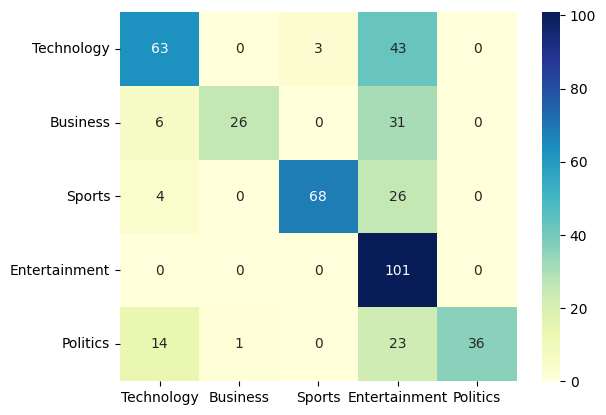

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,X.shape,y.shape


((80, 6052), (20, 6052), (80, 5), (20, 5), (100, 6052), (100, 5))

In [23]:
df['Category'].unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

#Best Accuracy came with Logistic Regression so far > 95%.

#Use Pre-trained Vectors - Word2Vec

In [ ]:
import gensim
#from gensim.models import word2vec
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv=api.load('fasttext-wiki-news-subwords-300')
#wv.save('path')

[==================================================] 100.0% 958.5/958.4MB downloaded


[[-0.20188966 -0.168247  ]
 [-0.5583138  -0.50207645]
 [ 0.5685122  -0.10687272]
 [ 0.53361326  0.01395208]
 [-0.34192201  0.7632442 ]]


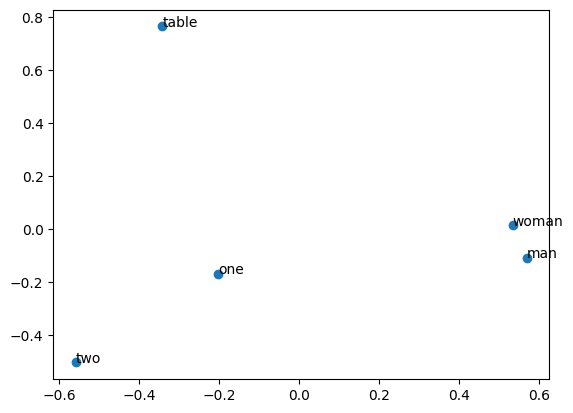

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words=['one','two','man','woman','table']
sample_vectors=np.array([wv[word] for word in words])
pca=PCA(n_components=2)
result=pca.fit_transform(sample_vectors)
print(result)
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
  plt.annotate(word,xy=(result[i,0],result[i,1]))

In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res


# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    #print(doc,type(doc))
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
sent_vec("I am happy")
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
#print(stop_words)

import string
punctuations = string.punctuation
print(punctuations)
df['tokens'] = df['Article'].apply(spacy_tokenizer)
df['vectorized_Article'] = df['tokens'].apply(sent_vec)

df.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Category,Article,vectorized_Article,tokens
0,Technology,tv future in the hands of viewers with home th...,"[-0.002603077870615309, -0.03066279079000481, ...","[tv, future, hand, viewer, home, theatre, syst..."
1,Business,worldcom boss left books alone former worldc...,"[0.008477667992701754, -0.013911379969795235, ...","[worldcom, boss, leave, book, worldcom, boss, ..."
2,Sports,tigers wary of farrell gamble leicester say ...,"[0.01311463125667876, -0.02916890523502474, 0....","[tiger, wary, farrell, gamble, leicester, rush..."
3,Sports,yeading face newcastle in fa cup premiership s...,"[0.021752061655837568, -0.02909082831311211, 0...","[yeade, face, newcastle, fa, cup, premiership,..."
4,Entertainment,ocean s twelve raids box office ocean s twelve...,"[0.0032561432178474865, -0.012186143135212742,...","[ocean, s, raid, box, office, ocean, s, crime,..."


accuracy 0.9213483146067416
               precision    recall  f1-score   support

     Business       0.85      0.97      0.91       102
Entertainment       0.93      0.92      0.93        77
     Politics       0.91      0.82      0.86        84
       Sports       0.97      0.98      0.98       102
   Technology       0.96      0.89      0.92        80

     accuracy                           0.92       445
    macro avg       0.93      0.92      0.92       445
 weighted avg       0.92      0.92      0.92       445



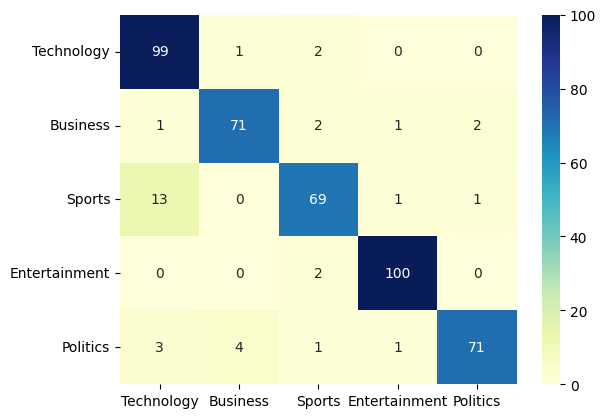

In [ ]:
X = df['vectorized_Article'].to_list()
y = df['Category'].to_list()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
LogisticRegression()
from sklearn import metrics
predicted = classifier.predict(X_test)
print('accuracy %s' % accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
conf_matrix(y_test, predicted)

In [ ]:
complaint = "ocean s twelve raids box office ocean s twelve  the crime caper sequel starring george clooney  brad pitt and julia roberts  has gone straight to number one in the us box office chart.  it took $40.8m (£21m) in weekend ticket sales  according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one  national treasure  into third place. wesley snipes  blade: trinity was in second  taking $16.1m (£8.4m). rounding out the top five was animated fable the polar express  starring tom hanks  and festive comedy christmas with the kranks.  ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us  after the three films in the lord of the rings trilogy. the sequel narrowly beat its 2001 predecessor  ocean s eleven which took $38.1m (£19.8m) on its opening weekend and $184m (£95.8m) in total. a remake of the 1960s film  starring frank sinatra and the rat pack  ocean s eleven was directed by oscar-winning director steven soderbergh. soderbergh returns to direct the hit sequel which reunites clooney  pitt and roberts with matt damon  andy garcia and elliott gould. catherine zeta-jones joins the all-star cast.  it s just a fun  good holiday movie   said dan fellman  president of distribution at warner bros. however  us critics were less complimentary about the $110m (£57.2m) project  with the los angeles times labelling it a  dispiriting vanity project . a milder review in the new york times dubbed the sequel  unabashedly trivial ."
complaint_token = spacy_tokenizer(complaint)
#complaint_token

X_pred=sent_vec(complaint_token).reshape(1,-1)
#X_pred

classifier.predict(X_pred)

array(['Entertainment'], dtype='<U13')